# Load the data

In [1]:
%run env.ipynb

In [2]:
import pickle
import os
import numpy as np
from jLM.RDME import File as RDMEFile
import jLM
import json
import matplotlib.pyplot as plt
import seaborn as sns
from traj_analysis_rdme import *
from tqdm import tqdm
import logging 

2025-02-27 14:43:19,302 - INFO - Starting RDME and ODE trajectory processing in directory: /data2/2024_Yeast_GS/my_current_code/rdme_ode_results/20250120_11_1_60_Normal_newtomo
2025-02-27 14:43:19,304 - INFO - Found 3 matching files: ['yeast1.13.1mt_multi_20250105_2_t60.0minGAE11.1mMdt_4gpu_gpu4.lm', 'yeast1.13.1mt_multi_20250115_3_t60.0minGAE11.1mMdt_4gpu_gpu4.lm', 'yeast1.13.1mt_multi_20241229_1_t60.0minGAE11.1mMdt_4gpu_gpu4.lm']
Processing files:   0%|          | 0/3 [00:00<?, ?file/s]2025-02-27 14:43:19,308 - INFO - Processing file: yeast1.13.1mt_multi_20250105_2_t60.0minGAE11.1mMdt_4gpu_gpu4.lm
2025-02-27 14:43:21,502 - INFO - Time-series data loaded for file: yeast1.13.1mt_multi_20250105_2_t60.0minGAE11.1mMdt_4gpu_gpu4.lm
2025-02-27 14:43:22,770 - INFO - Plotted gene states duration for: yeast1.13.1mt_multi_20250105_2_t60.0minGAE11.1mMdt_4gpu_gpu4.lm
2025-02-27 14:43:22,921 - INFO - Generated duration table for: yeast1.13.1mt_multi_20250105_2_t60.0minGAE11.1mMdt_4gpu_gpu4.lm
2025

NAV:  15359584468.357904


Processing files:   0%|          | 0/3 [00:09<?, ?file/s]


KeyboardInterrupt: 

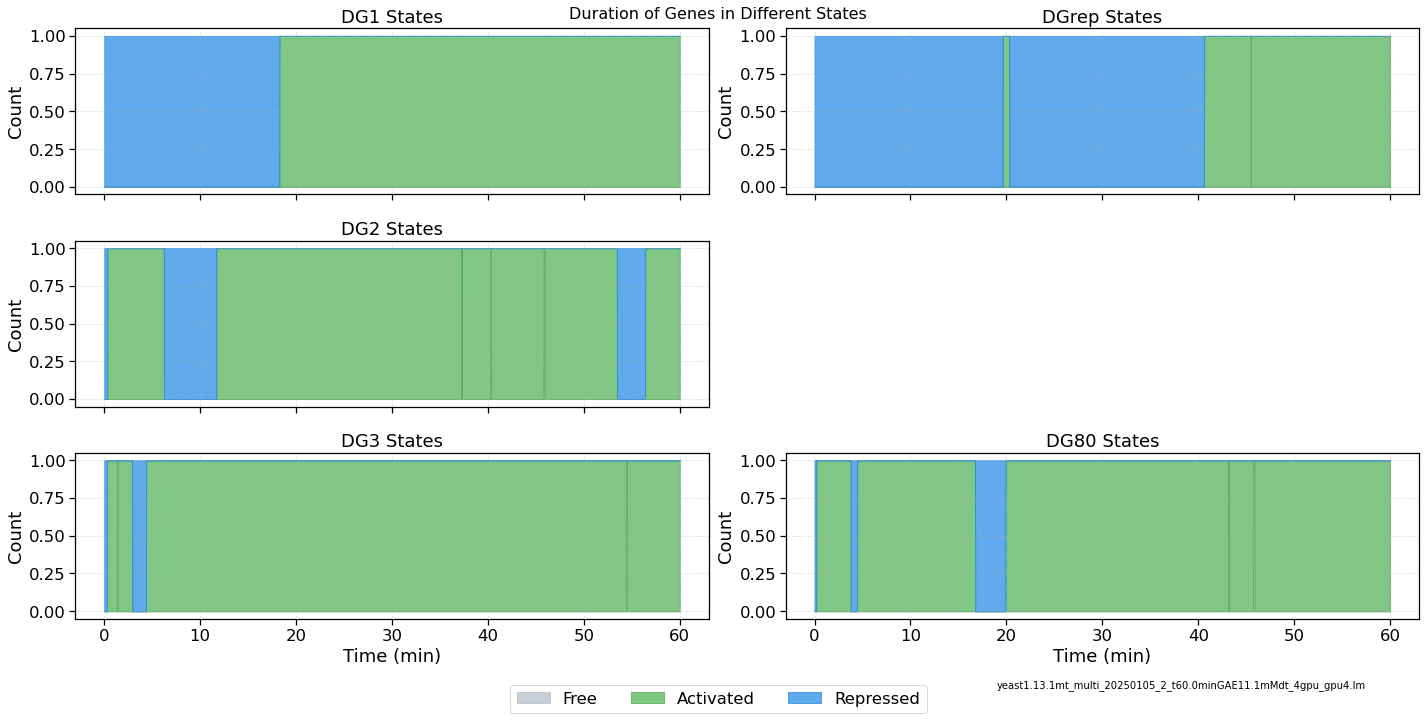

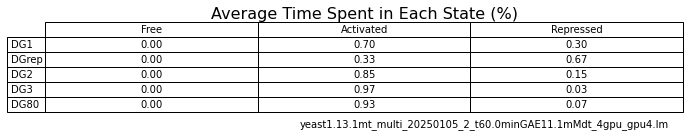

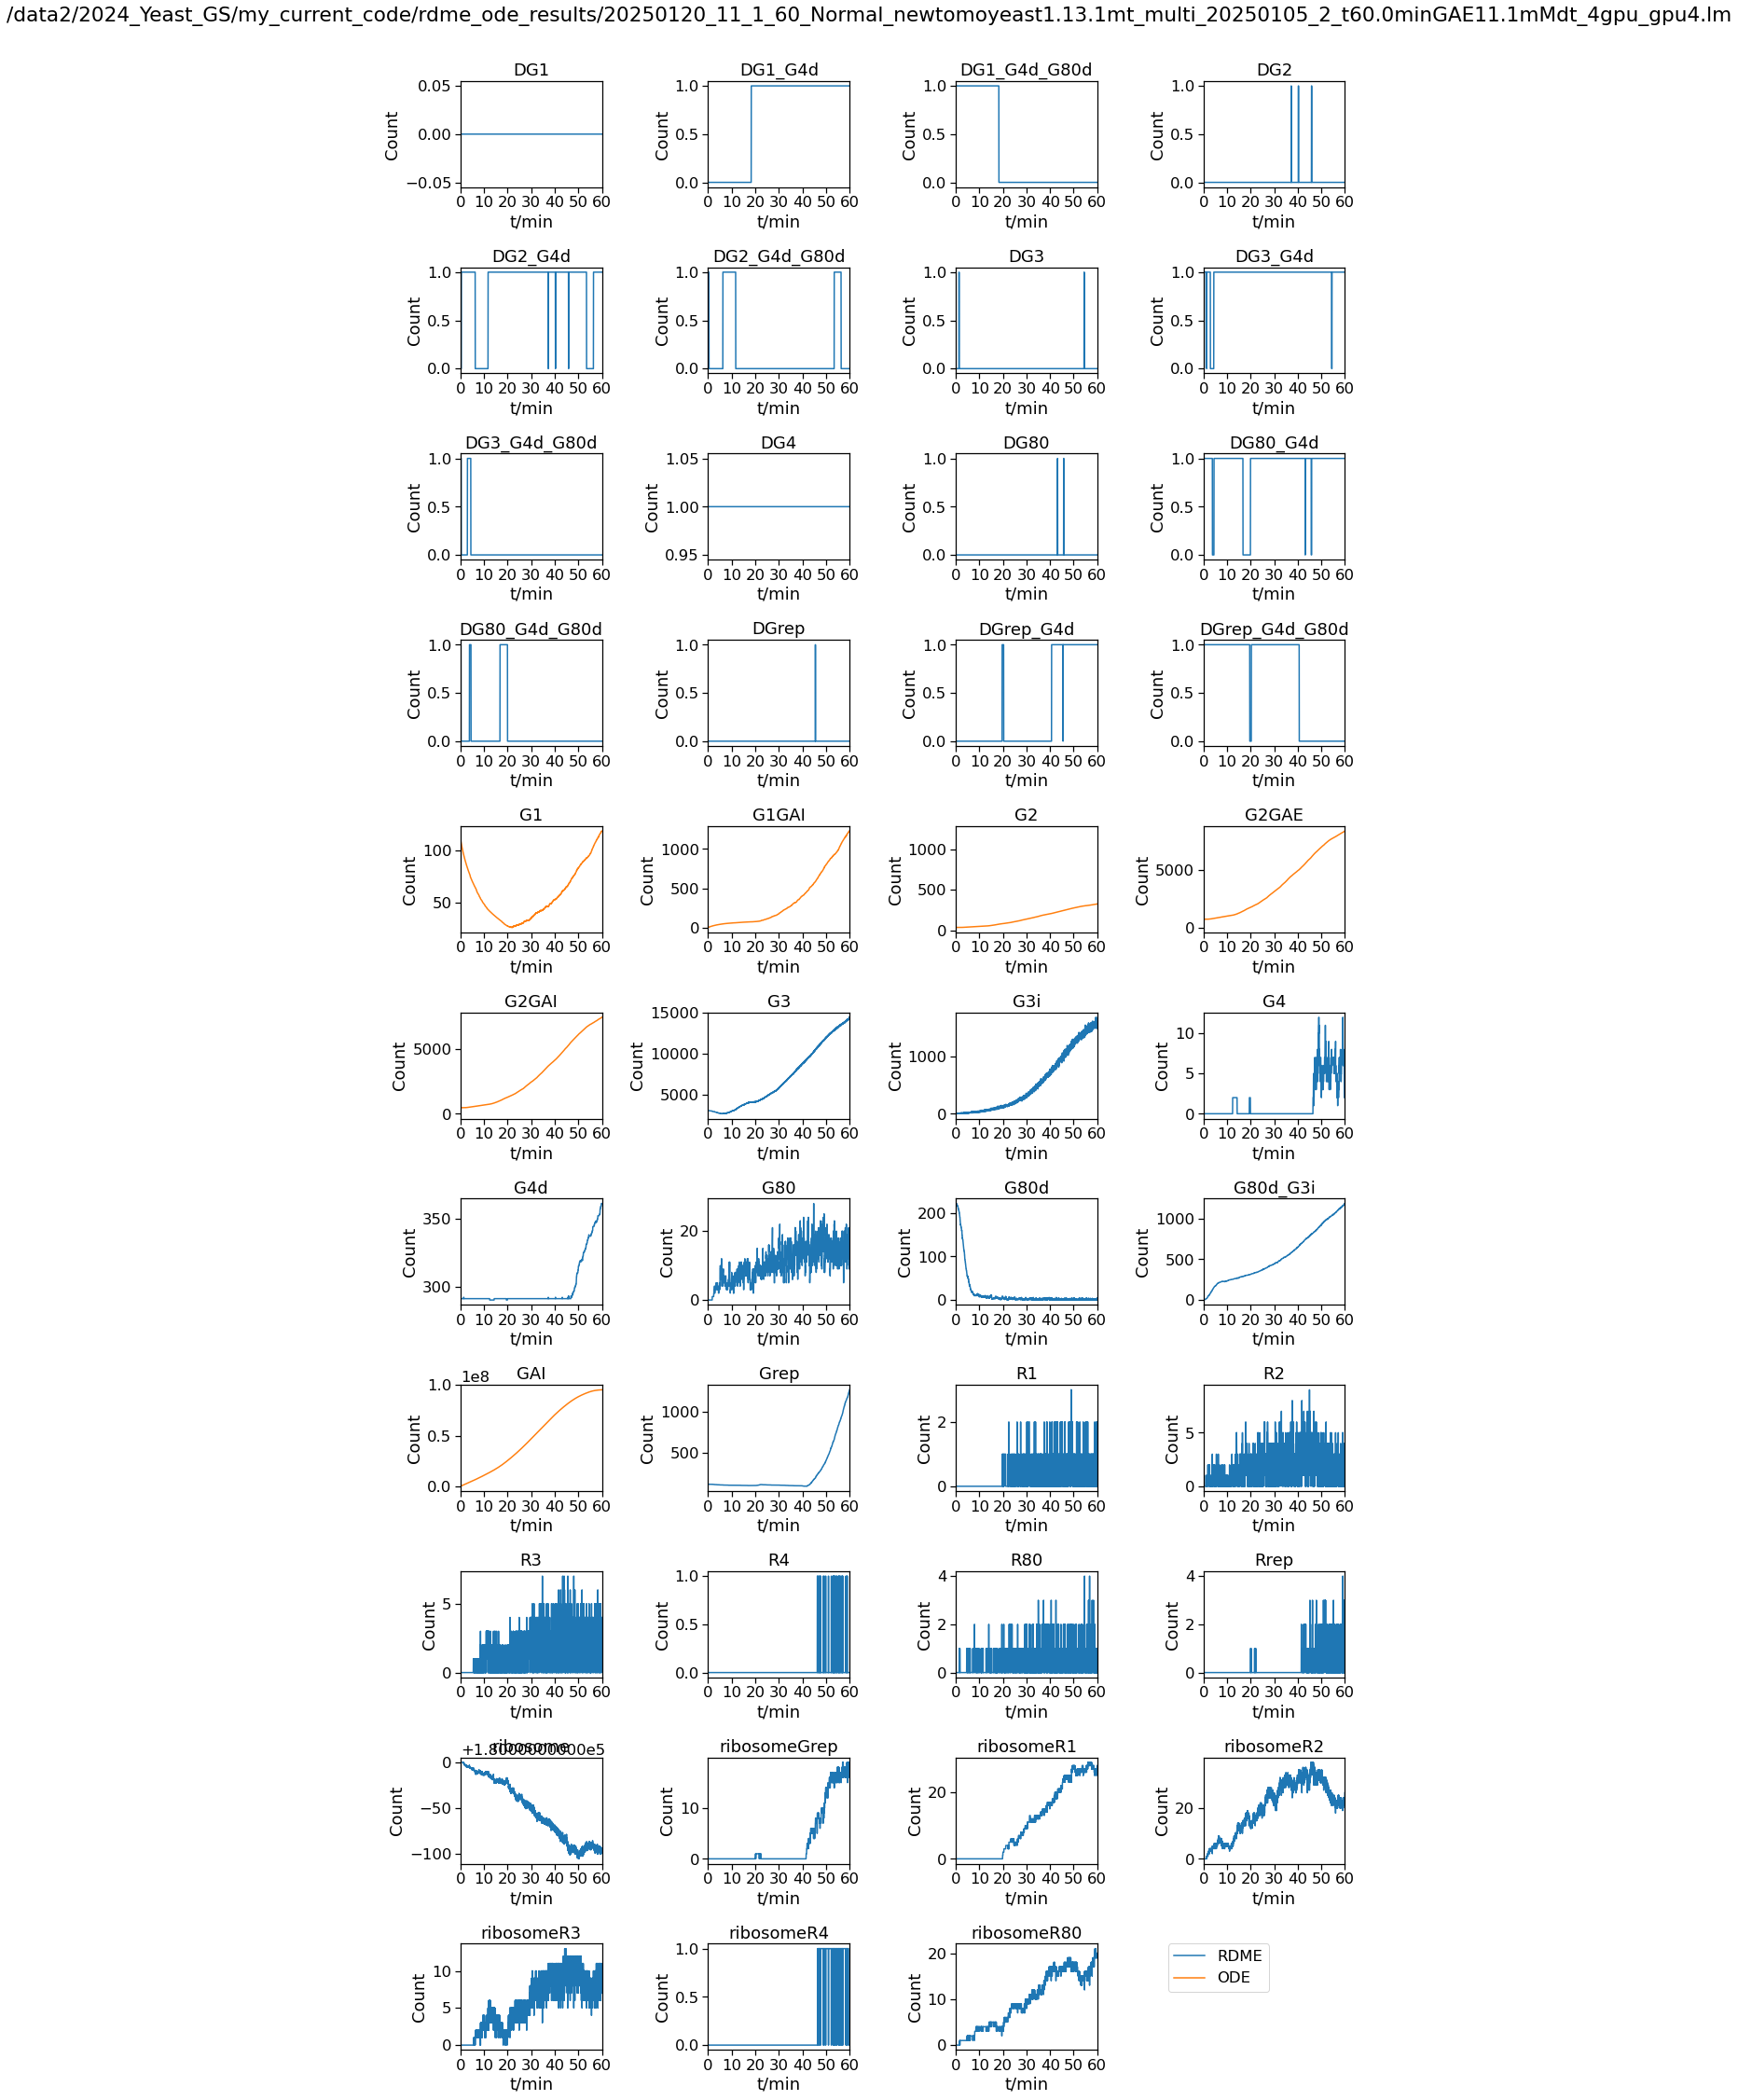

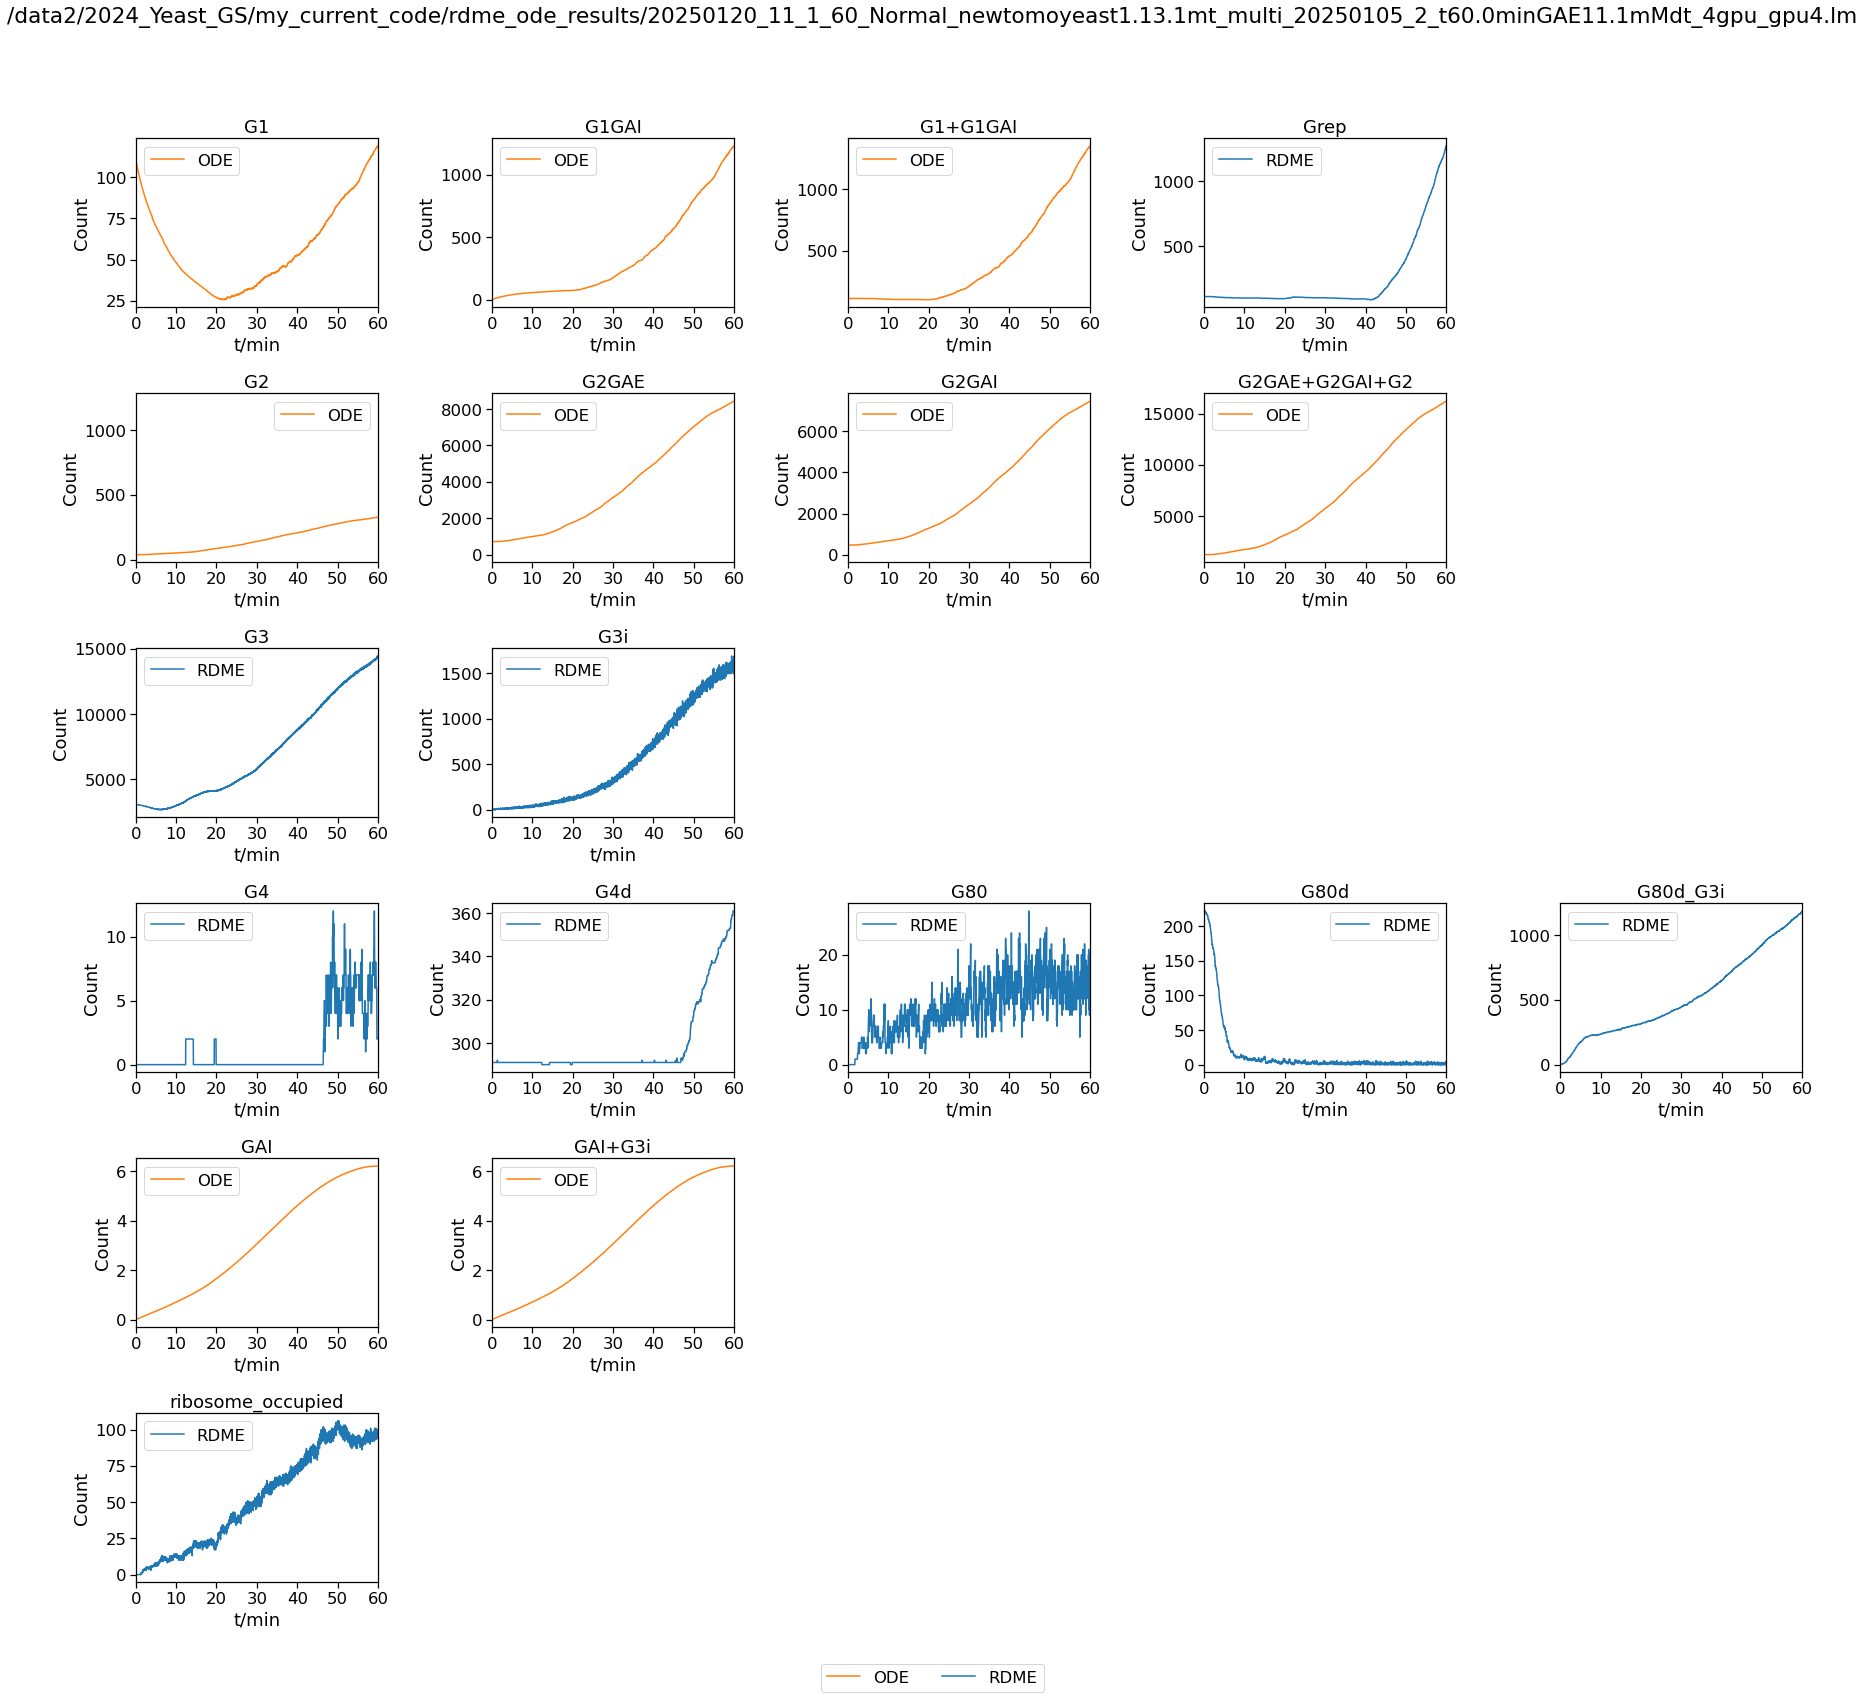

In [3]:
# Define directories
traj_dir = "/data2/2024_Yeast_GS/my_current_code/rdme_ode_results/20250120_11_1_60_Normal_newtomo"
fig_dir = os.path.join(traj_dir, 'analysis_figures')

# Configure logging
log_file = os.path.join(fig_dir, 'run_log.log')
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(log_file),
        logging.StreamHandler()
    ]
)

logging.info(f"Starting RDME and ODE trajectory processing in directory: {traj_dir}")

matching_files = [f for f in os.listdir(traj_dir) if f.startswith('yeast') and f.endswith('.lm')]
logging.info(f"Found {len(matching_files)} matching files: {matching_files}")

traj_suff = "_ode.jsonl"

# Process each file
for traj_file in tqdm(matching_files, desc="Processing files", unit="file"):
    logging.info(f"Processing file: {traj_file}")
    traj, odeTraj, region_traj = get_traj(traj_dir, traj_file, traj_suff, region_suff='_region.jsonl')

    # Read time-series data
    rdmeTs, rdmeYs, odeTs, odeYs, regionTs, regionYs = get_data_for_plot(traj, odeTraj, region_traj, sparse_factor=1)
    logging.info(f"Time-series data loaded for file: {traj_file}")

    # Plot gene states duration
    plot_gene_states_duration(traj_file, fig_dir, rdmeTs, rdmeYs)
    logging.info(f"Plotted gene states duration for: {traj_file}")

    # Create a table for the average time spent in each state
    plot_gene_states_duration_table(traj_file, fig_dir, rdmeTs, rdmeYs)
    logging.info(f"Generated duration table for: {traj_file}")

    # Plot all species
    plot_all_species(traj_file, traj_dir, fig_dir, rdmeTs, rdmeYs, odeTs, odeYs)
    logging.info(f"Plotted all species for: {traj_file}")

    # Tailored species plot
    plot_tailored_species(traj, traj_file, traj_dir, fig_dir, rdmeTs, rdmeYs, odeTs, odeYs)
    logging.info(f"Plotted tailored species data for: {traj_file}")

    # Species-specific plots for interested species
    interested_species = ['Grep', 'G2', 'G4', 'G80']
    for species in interested_species:
        plot_species_specific(species, traj_file, traj_dir, fig_dir, rdmeTs, rdmeYs, odeTs, odeYs)
        logging.info(f"Plotted species-specific data for {species} in: {traj_file}")

    # Plot species by region
    region_species = ['Grep', 'G2', 'G4', 'G80', 'G80d', 'G4d']
    interested_regions = region_traj['regions']
    for species in region_species:
        plot_species_by_region(species, interested_regions, traj_file, fig_dir, regionTs, regionYs, region_traj['regions'], region_traj['names'])
        logging.info(f"Plotted species {species} by region for: {traj_file}")

logging.info("Processing completed successfully.")


In [4]:
break

SyntaxError: 'break' outside loop (668683560.py, line 4)

## Depreciated

In [ ]:
# def boxcar(ts,ys,factor):
#     ts2 = np.zeros(ts.size//factor)
#     ys2 = np.zeros(ts.size//factor)
#     n = factor*(ts.size//factor)
#     for i in range(factor):
#         ts2 += ts[i:n:factor]
#         ys2 += ys[i:n:factor]
#     return ts2/factor, ys2/factor

In [ ]:
# g80dimers = ['DG2_G4d_G80d', 'G80d', 'RGrep', 'DGrep_G4d_G80d', 'DG80_G4d_G80d', 'DG3_G4d_G80d', 'G80G3i',  'DG1_G4d_G80d']
# g80monomers = ['G80']

In [ ]:
# nucNs = (sum(rdmePerCompartment[x]['nucleoplasm']['number'] for x in g80dimers)
#           + 0.5*sum(rdmePerCompartment[x]['nucleoplasm']['number'] for x in g80monomers))
# allNs = (sum(rdmeYs[x] for x in g80dimers) + 0.5*sum(rdmeYs[x] for x in g80monomers))

# nucCs = (sum(rdmePerCompartment[x]['nucleoplasm']['conc'] for x in g80dimers)
#           + 0.5*sum(rdmePerCompartment[x]['nucleoplasm']['conc'] for x in g80monomers))
# cytCs = (sum(rdmePerCompartment[x]['cytoplasm']['conc'] for x in g80dimers)
#           + 0.5*sum(rdmePerCompartment[x]['cytoplasm']['conc'] for x in g80monomers))

# deci = 200
# deciTs, nuclearFraction = boxcar(rdmeTs, nucNs/allNs, deci)
# deciTs, nuclearConc = boxcar(rdmeTs, nucCs, deci)
# deciTs, cytoConc = boxcar(rdmeTs, cytCs, deci)

# nuclearConc = nuclearConc/1e-9
# cytoConc = cytoConc/1e-9

In [ ]:
# fig, ax = plt.subplots(figsize=(5,3.5))

# ax.plot(deciTs[:60], nuclearConc[:60], label="Nucleus")
# ax.plot(deciTs[:60], cytoConc[:60], label="Cytoplasm")
# # ax.set(xlim=(deciTs[0], deciTs[-1]), xlabel="t(min)", ylabel="nM")
# ax.set(xlim=(deciTs[0], 60), xlabel="t(min)", ylabel="nM")
# ax.legend()
# ax.title.set_text("Concentration of G$_{80}$ dimer")
# # add annotation to the plot

# # fig.tight_layout()
# plt.savefig('G80_concentration.png',dpi=300,bbox_inches='tight')

In [ ]:
# # fig, ax = plt.subplots(figsize=(5,3.5))
# fig, ax = plt.subplots()
# ax.plot(deciTs, nuclearFraction, label="$n_{\mathrm{G80}}$ nuc./total")
# ax.plot(odeTs, 1e3*odeYs["GAI"]/NAV/11.1, label="[Gal] cyt./ext.")
# # ax.set(xlim=(deciTs[0], deciTs[-1]), ylim=(0,0.4), xlabel="t/min", ylabel="Fraction")
# ax.set(xlim=(deciTs[0], 60), ylim=(0,0.4), xlabel="t/min", ylabel="Fraction")
# ax.legend()
# ax.title.set_text("Fraction of G$_{80}$ in nucleus, [Gal] in cytoplasm/extra-cellular")
# # fig.tight_layout()
# fig.savefig('fraction.png',dpi=300,bbox_inches='tight')

In [ ]:
# fig, ax = plt.subplots(figsize=(0.8*6,0.8*3.5))
# ax2 = ax.twinx()
# #ax.plot(deciTs, nuclearFraction, label="$n_{\mathrm{G80}}$ nuc./total")

# nmemg2 = rdmePerCompartment['G2']['plasmaMembrane']['number']
# _, nmemg2 = boxcar(rdmeTs, nmemg2, deci)
# colors = sns.color_palette()

# g2plot = ax.plot(deciTs, nmemg2/1e3, c=colors[0])[0]
# gaiplot = ax2.plot(odeTs, 1e3*odeYs["GAI"]/NAV, c=colors[1])[0]
# ax.set(xlim=(deciTs[0], deciTs[-1]), xlabel="t/min")
# ax2.set(xlim=(deciTs[0], deciTs[-1]), xlabel="t/min")
# ax2.set(ylabel=r"[Gal]$_{\mathrm{int}}$/mM", ylim=(0,6))
# ax.set(ylabel=r"n$_{\mathrm{G2}}$/$10^{3}$", ylim=(0,13))
# ax.legend([g2plot,gaiplot], ["G2", "Internal galactose"])
# fig.tight_layout()